In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
file = r'E:\machin-prj\dataset\지역\전국.xlsx'

region = pd.read_excel(file)
region.head(3)


,addr1,addr2,areacode,booktour,cat1,cat2,cat3,contentid,contenttypeid,createdtime,...,firstimage2,cpyrhtDivCd,mapx,mapy,mlevel,modifiedtime,sigungucode,tel,title,zipcode
0,충청남도 공주시 감영길 3,(반죽동),34.0,NaN,쇼핑,쇼핑,전문매장/상가,2750144,38,20210928012320,...,NaN,NaN,127.121672,36.452930,6.0,20241226163730,1.0,NaN,가가상점,32546
1,부산광역시 부산진구 중앙번영로 (6),NaN,6.0,NaN,음식,음식점,일식,2805408,39,20220125140006,...,NaN,NaN,129.059828,35.144807,6.0,20240104133528,7.0,NaN,가가와,47361
2,충청남도 공주시 당간지주길 10 (반죽동),(반죽동),34.0,NaN,인문(문화/예술/역사),문화시설,대형서점,2750143,14,20210928012011,...,NaN,NaN,127.121975,36.452119,6.0,20250317204035,1.0,NaN,가가책방,32549


In [23]:
mapping = {
    # 특별·광역시
    '서울특별시':       '서울시',
    '부산광역시':       '부산시',
    '대구광역시':       '대구시',
    '인천광역시':       '인천시',
    '광주광역시':       '광주시',
    '대전광역시':       '대전시',
    '울산광역시':       '울산시',
    '세종특별자치시':   '세종시',

    # 도(省)
    '경기도':         '경기도',
    '강원도':         '강원도',
    '충청북도':       '충청북도',
    '충청남도':       '충청남도',
    '전라북도':       '전라북도',
    '전라남도':       '전라남도',
    '경상북도':       '경상북도',
    '경상남도':       '경상남도',
    '제주특별자치도': '제주도',
}

In [24]:
df= region

In [25]:
# 한글 폰트 설정 (Windows 예시)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


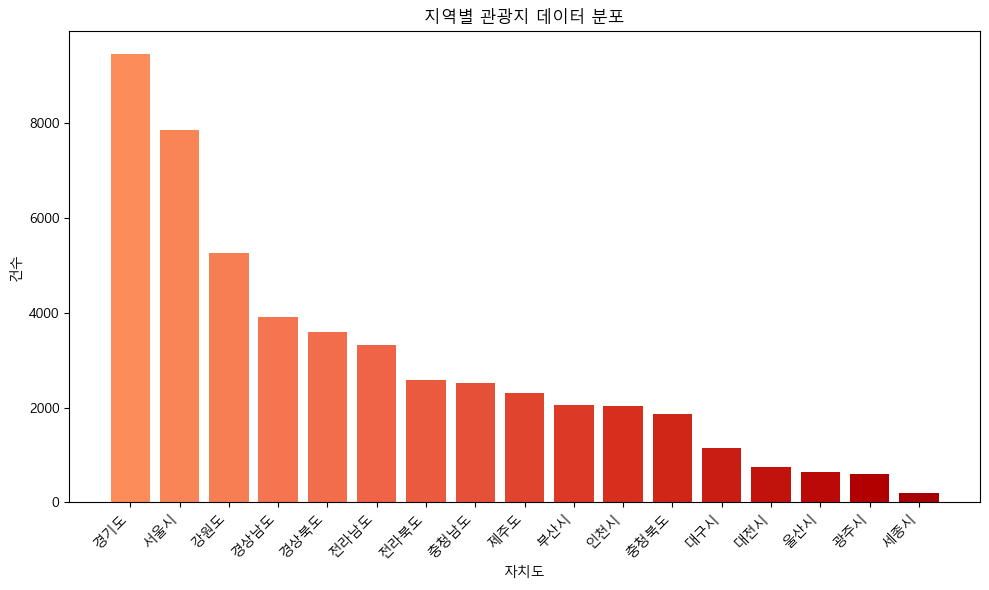

In [26]:
# 1) mapping 정의 (앞서 드린 17개 전체)
mapping = {
    '서울특별시': '서울시', '부산광역시': '부산시', '대구광역시': '대구시',
    '인천광역시': '인천시', '광주광역시': '광주시', '대전광역시': '대전시',
    '울산광역시': '울산시', '세종특별자치시': '세종시',
    '경기도': '경기도', '강원특별자치도': '강원도', '충청북도': '충청북도',
    '충청남도': '충청남도', '전북특별자치도': '전라북도', '전라남도': '전라남도',
    '경상북도': '경상북도', '경상남도': '경상남도', '제주특별자치도': '제주도'
}

# 2) ^(키1|키2|…|키17) 패턴 생성
pattern = r'^(' + '|'.join(mapping.keys()) + ')'

# 3) addr1에서 자치도만 추출
df['region'] = df['addr1'].str.extract(pattern, expand=False)

# 4) 매핑 → 약칭으로 변환
df['region'] = df['region'].replace(mapping)

# 5) NaN 제거 (자치도 외 지역은 모두 drop)
df = df.dropna(subset=['region'])

# … mapping·전처리는 동일 …

counts = df['region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cmap   = plt.cm.OrRd                   # 다른 컬러맵 예시
colors = cmap(np.linspace(0.5, 0.9, len(counts)))  # 연→진 (최소값이 진한색)

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('자치도')
plt.ylabel('건수')
plt.title('지역별 관광지 데이터 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
subway_file = r'E:\machin-prj\dataset\대중교통위치\전체_도시철도역사정보_20250417.xlsx'
bus_file = r'E:\machin-prj\dataset\대중교통위치\국토교통부_전국 버스정류장 위치정보_20241028.csv'

subway = pd.read_excel(subway_file)
bus = pd.read_csv(bus_file, encoding='cp949', low_memory=False)

subway.head(3)

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,0124,청량리(서울시립대입구),I4101,1호선,Cheongnyangni (University of Seoul),淸凉里(서울市立大入口),도시철도 환승역,I41K1+I41K2+I41K4,수도권 광역철도 분당+수도권 광역철도 경춘+수도권 광역철도 경의중앙,NaN,NaN,서울교통공사,서울특별시 동대문구 왕산로 지하205(전농동),02-6110-1241,2024-12-31 00:00:00
1,0125,제기동,I4101,1호선,Jegidong,祭基洞,도시철도 일반역,NaN,NaN,NaN,NaN,서울교통공사,서울특별시 동대문구 왕산로 지하93(제기동),02-6110-1251,2024-12-31 00:00:00
2,0126,신설동,I4101,1호선,Sinseoldong,新設洞,도시철도 환승역,S1102,수도권 도시철도 2호선,NaN,NaN,서울교통공사,서울특별시 동대문구 왕산로 지하1(신설동),02-6110-1261,2024-12-31 00:00:00


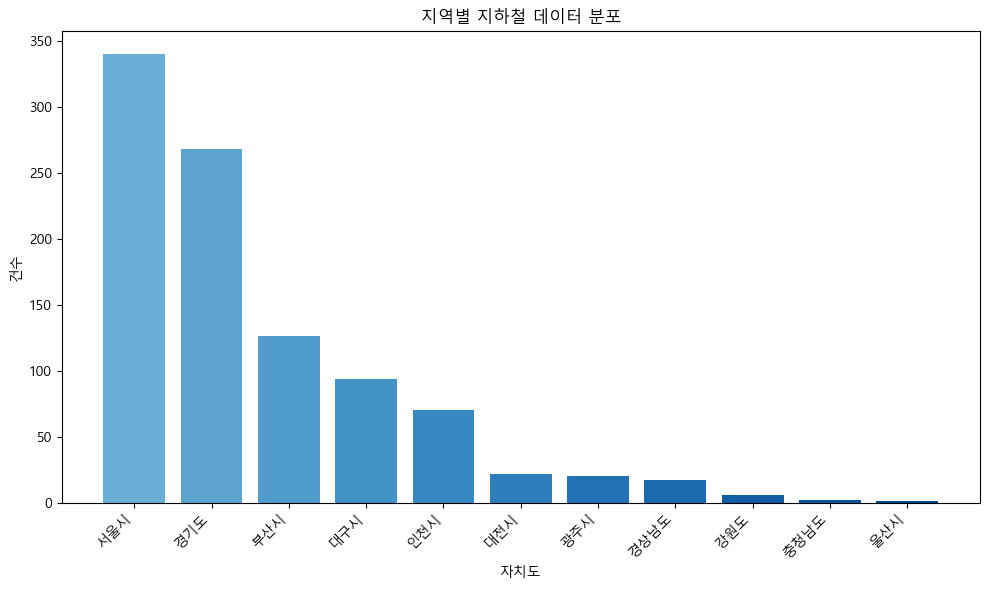

In [28]:
# 1) mapping 정의 (앞서 드린 17개 전체)
mapping = {
    '서울특별시': '서울시', '부산광역시': '부산시', '대구광역시': '대구시',
    '인천광역시': '인천시', '광주광역시': '광주시', '대전광역시': '대전시',
    '울산광역시': '울산시', '세종특별자치시': '세종시',
    '경기도': '경기도', '강원도': '강원도', '충청북도': '충청북도',
    '충청남도': '충청남도', '전라북도': '전라북도', '전라남도': '전라남도',
    '경상북도': '경상북도', '경상남도': '경상남도', '제주특별자치도': '제주도'
}

# 2) ^(키1|키2|…|키17) 패턴 생성
pattern = r'^(' + '|'.join(mapping.keys()) + ')'

# 3) addr1에서 자치도만 추출
subway['region'] = subway['역사도로명주소'].str.extract(pattern, expand=False)

# 4) 매핑 → 약칭으로 변환
subway['region'] = subway['region'].replace(mapping)

# 5) NaN 제거 (자치도 외 지역은 모두 drop)
subway = subway.dropna(subset=['region'])

# 6) 집계 ▶ 크기순(내림차순)으로 정렬
counts = subway['region'].value_counts().sort_values(ascending=False)

# ----------- 시각화 -----------
plt.figure(figsize=(10, 6))

# (새로 추가) 그라데이션 색상 배열 생성
# 가장 큰 값→짙은 색, 작은 값→연한 색이 되도록 linspace를 역순으로 줌
cmap = plt.cm.Blues  # colormap은 viridis, OrRd 등 원하는 것으로 바꿀 수 있음
colors = cmap(np.linspace(0.5, 0.9, len(counts)))  # 0.9(진한) → 0.2(연한)

bars = plt.bar(counts.index, counts.values, color=colors)

plt.xlabel('자치도')
plt.ylabel('건수')
plt.title('지역별 지하철 데이터 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
bus.head(3)

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000001,길안정류장,36.458658,128.891228,2024-10-28,540001.0,37040,경상북도 안동시,안동BIS
1,ADB354000002,고란.계명산휴양림입구,36.397708,128.924029,2024-10-28,540002.0,37040,경상북도 안동시,안동BIS
2,ADB354000003,금곡리,36.397504,128.926821,2024-10-28,540003.0,37040,경상북도 안동시,안동BIS


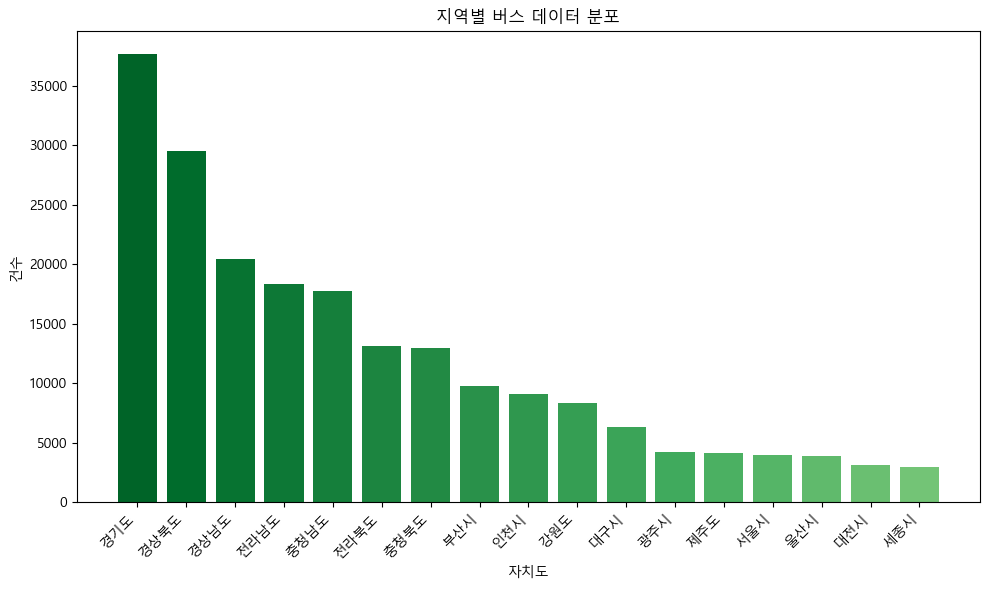

In [30]:
# 1) mapping 정의 (앞서 드린 17개 전체)
mapping = {
    '서울특별시': '서울시', '부산광역시': '부산시', '대구광역시': '대구시',
    '인천광역시': '인천시', '광주광역시': '광주시', '대전광역시': '대전시',
    '울산광역시': '울산시', '세종특별자치시': '세종시',
    '경기도': '경기도', '강원특별자치도': '강원도', '충청북도': '충청북도',
    '충청남도': '충청남도', '전라북도': '전라북도', '전라남도': '전라남도',
    '경상북도': '경상북도', '경상남도': '경상남도', '제주특별자치도': '제주도'
}

# 2) ^(키1|키2|…|키17) 패턴 생성
pattern = r'^(' + '|'.join(mapping.keys()) + ')'

# 3) addr1에서 자치도만 추출
bus['region'] = bus['도시명'].str.extract(pattern, expand=False)

# 4) 매핑 → 약칭으로 변환
bus['region'] = bus['region'].replace(mapping)

# 5) NaN 제거 (자치도 외 지역은 모두 drop)
bus = bus.dropna(subset=['region'])

# 6) 집계 ▶ 건수 내림차순 정렬
counts = bus['region'].value_counts().sort_values(ascending=False)

# --------- 시각화 ----------
plt.figure(figsize=(10, 6))

# 값이 클수록(막대 앞쪽) 진한 색, 작을수록 연한 색
cmap   = plt.cm.Greens        # Blues·OrRd 등 원하는 컬러맵으로 교체 가능
colors = cmap(np.linspace(0.9, 0.5, len(counts)))  # 0.9→0.2 : 진→연

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('자치도')
plt.ylabel('건수')
plt.title('지역별 버스 데이터 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# ♦︎ ‘서울특별시’·‘인천시’·‘경기도’ 만 남기기
mask = subway['역사도로명주소'].str.contains(r'(서울특별시|인천광역시|경기도)', regex=True, na=False)
subway = subway[mask].copy()
subway.to_excel(r'E:\machin-prj\dataset\대중교통위치\subway.xlsx', index=False)

C:\Users\hyunj\AppData\Local\Temp\ipykernel_11068\3740845423.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = subway['역사도로명주소'].str.contains(r'(서울특별시|인천광역시|경기도)', regex=True, na=False)


In [33]:
mask = bus['도시명'].str.contains(r'(서울특별시|인천광역시|경기도)', regex=True, na=False)
bus = bus[mask].copy()
bus.to_excel(r'E:\machin-prj\dataset\대중교통위치\bus.xlsx', index=False)

C:\Users\hyunj\AppData\Local\Temp\ipykernel_11068\930367750.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = bus['도시명'].str.contains(r'(서울특별시|인천광역시|경기도)', regex=True, na=False)


In [39]:
import os
os.environ["KAKAO_API_KEY"] = "0be64775eb0d51574480225b2b175243"


In [40]:
import os, time, requests, pandas as pd
from functools import lru_cache
from urllib3.util import Retry
from requests.adapters import HTTPAdapter

# ------------------------------------------------
# 0) 안전하게 키 불러오기
#    └ 셸에서  export KAKAO_API_KEY="새키"
# ------------------------------------------------
REST_API_KEY = os.getenv("KAKAO_API_KEY")
if not REST_API_KEY:
    raise RuntimeError("KAKAO_API_KEY 환경변수가 없습니다!")

HEADERS = {"Authorization": f"KakaoAK {REST_API_KEY}"}

# ------------------------------------------------
# 1) 재시도 가능한 requests.Session 준비
# ------------------------------------------------
session = requests.Session()
retry = Retry(
    total         = 5,          # 최대 5회 재시도
    backoff_factor= 1,          # 0→1→2→4→8초 방식
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["GET"],
)
session.mount("https://", HTTPAdapter(max_retries=retry))

# ------------------------------------------------
# 2) 정류장명 → 행정동 변환 함수
# ------------------------------------------------
@lru_cache(maxsize=4096)
def stop_to_dong(stop_name: str) -> str | None:
    if not stop_name:
        return None

    url    = "https://dapi.kakao.com/v2/local/search/keyword.json"
    params = {"query": stop_name, "size": 1}

    try:
        # (connect timeout 5초, read timeout 10초)
        r = session.get(url, headers=HEADERS, params=params, timeout=(5, 10))
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"[WARN] {stop_name}: {e}")
        return None

    docs = r.json().get("documents", [])
    if not docs:
        return None

    addr = docs[0].get("address_name") or docs[0].get("road_address_name")
    if not addr:
        return None

    parts = addr.split()
    return parts[2] if len(parts) >= 3 else None

# ------------------------------------------------
# 3) DataFrame 적용 (중복 정류장 최소 호출)
# ------------------------------------------------
# bus = pd.read_csv("bus_stops.csv")  # 예시
unique_stops = bus["정류장명"].astype(str).unique()

# API 호출 (중복 제거 & 진행 상황 표시)
for i, name in enumerate(unique_stops, 1):
    _ = stop_to_dong(name)
    if i % 200 == 0:
        print(f"{i}/{len(unique_stops)} done")
    time.sleep(0.05)            # TPS 20 유지(= 0.05초 간격)

bus["행정동"] = bus["정류장명"].astype(str).apply(stop_to_dong)
bus = bus.dropna(subset=["행정동"]).reset_index(drop=True)
bus.to_csv("bus_with_dong.csv", index=False)


200/28025 done
400/28025 done
600/28025 done
800/28025 done
1000/28025 done
1200/28025 done
1400/28025 done
1600/28025 done
1800/28025 done
2000/28025 done
2200/28025 done
2400/28025 done
2600/28025 done
2800/28025 done
3000/28025 done
3200/28025 done
3400/28025 done
3600/28025 done
3800/28025 done
4000/28025 done
4200/28025 done
4400/28025 done
4600/28025 done
4800/28025 done
5000/28025 done
5200/28025 done
5400/28025 done
5600/28025 done
5800/28025 done
6000/28025 done
6200/28025 done
6400/28025 done
6600/28025 done
6800/28025 done
7000/28025 done
7200/28025 done
7400/28025 done
7600/28025 done
7800/28025 done
8000/28025 done
8200/28025 done
8400/28025 done
8600/28025 done
8800/28025 done
9000/28025 done
9200/28025 done
9400/28025 done
9600/28025 done
9800/28025 done
10000/28025 done
10200/28025 done
10400/28025 done
10600/28025 done
10800/28025 done
11000/28025 done
11200/28025 done
11400/28025 done
11600/28025 done
11800/28025 done
12000/28025 done
12200/28025 done
12400/28025 done

In [48]:
bus.head(3)

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명,region,행정동
0,GGB109000015,쌍문역(중),37.648833,127.03475,2024-10-28,10015.0,11,서울특별시,경기BIS,서울시,번동
1,GGB109000016,쌍문역(중),37.648133,127.03450,2024-10-28,10016.0,11,서울특별시,경기BIS,서울시,번동
2,GGB109000048,도봉구청,37.668983,127.04635,2024-10-28,10133.0,11,서울특별시,경기BIS,서울시,방학동


In [63]:
bus_counts = (
    subway.groupby("행정동", as_index=False)
          .size()
          .rename(columns={"size": "value"})
)

# --------------------------------------------
bus_counts

,행정동,value
0,1147(성남동,1
1,124번지(행신2동,1
2,1375(평내동,1
3,1429(성사1동,1
4,1432(주엽동,1
...,...,...
207,호계동,1
208,호원동,4
209,화도읍,2
210,화서동,1


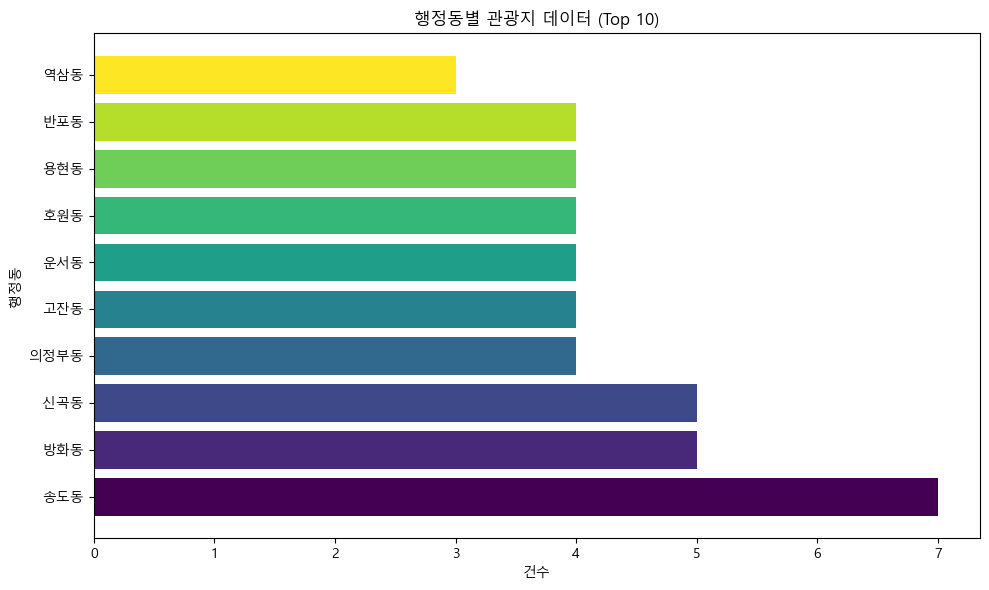

In [66]:
# 값 기준으로 내림차순 정렬 후 상위 10개 선택
bus_counts = bus_counts.sort_values(by="value", ascending=False).head(10)

# 그라데이션 색 적용
colors = plt.cm.viridis(np.linspace(0, 1, len(bus_counts)))

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(bus_counts["행정동"], bus_counts["value"], color=colors)
plt.xlabel("건수")
plt.ylabel("행정동")
plt.title("행정동별 관광지 데이터 (Top 10)")
plt.xticks(rotation=0)
plt.tight_layout()

In [50]:
import os, re, time, json, requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from functools import lru_cache
from urllib3.util import Retry
from requests.adapters import HTTPAdapter

# ------------------------------------------
# 0) 카카오 REST API 키 (환경변수에서 로드)
#    * 윈도 PowerShell:  setx KAKAO_API_KEY "발급_키"
# ------------------------------------------
API_KEY = os.getenv("KAKAO_API_KEY")
if not API_KEY:
    raise RuntimeError("KAKAO_API_KEY 환경변수가 없습니다!")

HEADERS = {"Authorization": f"KakaoAK {API_KEY}"}

# requests 세션 + 재시도 세팅
sess = requests.Session()
sess.mount("https://", HTTPAdapter(max_retries=Retry(
    total=5, backoff_factor=1,
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["GET"]
)))

# ------------------------------------------
# 1) 주소 문자열 → 행정동 파싱 함수
# ------------------------------------------
def parse_dong(addr: str | None) -> str | None:
    """주소에서 '○○동/○○가/○○읍/○○면' 토큰을 찾아 반환"""
    if not addr or not isinstance(addr, str):
        return None
    tokens = re.split(r"\s+", addr.strip())
    # 뒤에서부터 살펴보며 '동/가/읍/면' 으로 끝나는 첫 토큰 반환
    for tok in reversed(tokens):
        if tok.endswith(("동", "가", "읍", "면")):
            return tok
    return None

# ------------------------------------------
# 2) 카카오 키워드 검색 → 행정동 (주소 파싱 실패 시 보강)
# ------------------------------------------
@lru_cache(maxsize=4096)
def name_to_dong(keyword: str) -> str | None:
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    try:
        r = sess.get(url, headers=HEADERS,
                     params={"query": keyword, "size": 1},
                     timeout=(5, 10))
        r.raise_for_status()
    except requests.RequestException:
        return None

    docs = r.json().get("documents", [])
    if not docs:
        return None

    addr = docs[0].get("address_name") or docs[0].get("road_address_name")
    return parse_dong(addr)

# ------------------------------------------
# 3) subway DataFrame에 '행정동' 컬럼 채우기
# ------------------------------------------
def get_subway_dong(row):
    # ① 주소 파싱
    dong = parse_dong(row["역사도로명주소"])
    if dong:
        return dong
    # ② 주소가 없거나 파싱 실패 → 역명으로 키워드 검색
    return name_to_dong(row["역사도로명주소"])

# 주소·역명 컬럼명은 실제 데이터에 맞게 수정하세요
subway["행정동"] = subway.apply(get_subway_dong, axis=1)
subway = subway.dropna(subset=["행정동"]).reset_index(drop=True)

subway.to_csv("subway_with_dong.csv", index=False)

In [57]:
subway.head(3)

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자,region,행정동
0,0126,신설동,I4101,1호선,Sinseoldong,新設洞,도시철도 환승역,S1102,수도권 도시철도 2호선,NaN,NaN,서울교통공사,서울특별시 동대문구 왕산로 지하1(신설동),02-6110-1261,2024-12-31 00:00:00,서울시,신설동
1,0129,종로5가,I4101,1호선,Jongno 5(o)ga,鍾路5街,도시철도 일반역,NaN,NaN,NaN,NaN,서울교통공사,서울특별시 종로구 종로 지하216(종로5가),02-6110-1291,2024-12-31 00:00:00,서울시,종로5가
2,0130,종로3가,I4101,1호선,Jongno 3(sam)ga,鍾路3街,도시철도 환승역,I1103+S1105,수도권 광역철도 3호선+수도권 도시철도 5호선,NaN,NaN,서울교통공사,서울특별시 종로구 종로 지하129(종로3가),02-6110-1301,2024-12-31 00:00:00,서울시,종로3가


In [67]:
subway_counts = (
    subway.groupby("행정동", as_index=False)
          .size()
          .rename(columns={"size": "value"})
)

# --------------------------------------------
subway_counts

,행정동,value
0,1147(성남동,1
1,124번지(행신2동,1
2,1375(평내동,1
3,1429(성사1동,1
4,1432(주엽동,1
...,...,...
207,호계동,1
208,호원동,4
209,화도읍,2
210,화서동,1


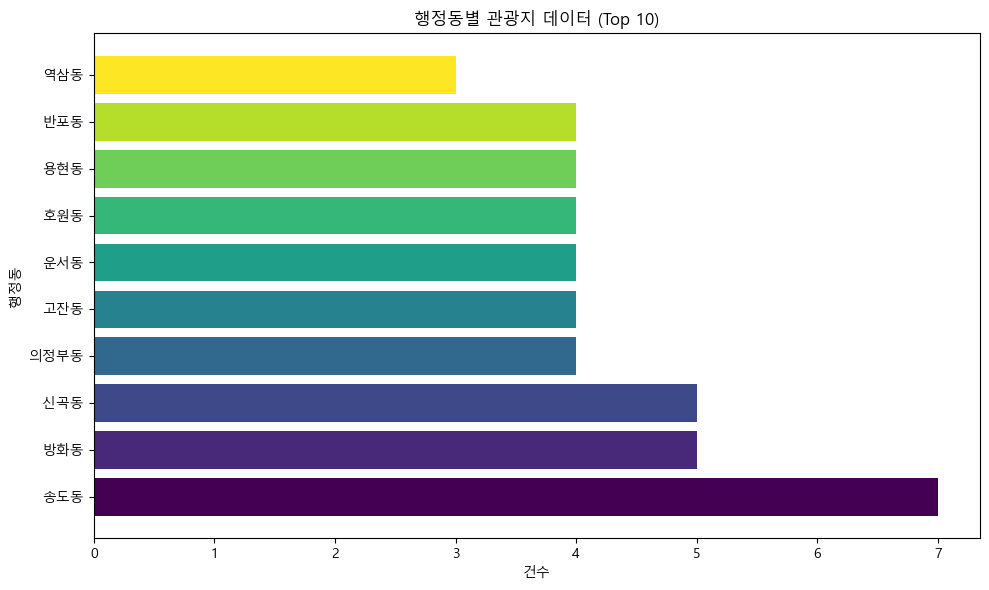

In [68]:
# 값 기준으로 내림차순 정렬 후 상위 10개 선택
subway_counts = subway_counts.sort_values(by="value", ascending=False).head(10)

# 그라데이션 색 적용
colors = plt.cm.viridis(np.linspace(0, 1, len(subway_counts)))

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(subway_counts["행정동"], subway_counts["value"], color=colors)
plt.xlabel("건수")
plt.ylabel("행정동")
plt.title("행정동별 관광지 데이터 (Top 10)")
plt.xticks(rotation=0)
plt.tight_layout()